# Introduction

By: Vijay Panchal (7225949)

COSC 3P91

This assignment utilizes logistic regression made from scratch to determine how various features can determine whether or not someone has diabetes. Using the Pima Indians Diabetes Dataset.

# Importing Libraries and Reading CSV File

Import pandas, numpy, and mathplotlib, and read in the Pima Indians Diabetes dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
"BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

data = pd.read_csv("/content/DiabetesData.csv", header=None, skiprows = 1, names=columns)

data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Preprocessing and Cleaning Data

In this step, the data is first filtered based on valid data and the mean is calculated for each column for each column.

In [ ]:
# Glucose can't be 0
filteredDataGlucose = data.loc[(data['Glucose'] != 0)]

# Mean of the filtered glucose
glucoseMean = round(filteredDataGlucose['Glucose'].mean())
print(glucoseMean)

# Blood pressure can't be 0
filteredDataBloodPressure = data.loc[(data['BloodPressure'] != 0)]

# Mean of the filtered blood pressure
bloodPressureMean = round(filteredDataBloodPressure['BloodPressure'].mean())
print(bloodPressureMean)

# Skin thickness can't be 0
filteredDataSkinThickness = data.loc[(data['SkinThickness'] != 0)]

# Mean of the filtered skin thickness
skinThicknessMean = round(filteredDataSkinThickness['SkinThickness'].mean())
print(skinThicknessMean)

# Filter the data by including either the insulin value is not 0 or the outcome is 1.
# This means that if both insulin level and outcome are 0, it is not included in the calculation of the mean.
# (Insulin level of 0 means type 1 diabetes so the outcome must be 1 if insulin level is 0)
filteredDataInsulin = data.loc[(data['Insulin'] != 0) | (data['Outcome'] == 1)]

# Mean of the filtered data
insulinMean = round(filteredDataInsulin['Insulin'].mean())
print(insulinMean)

# BMI can't be 0
filteredDataBMI = data.loc[(data['BMI'] != 0)]

# Mean of the filtered BMI
bmiMean = round(filteredDataBMI['BMI'].mean(), 1)
print(bmiMean)


122
72
29
115
32.5


The invalid 0's are then replaced by the mean of the columns.

In [ ]:
# Replace 0's in Glucose to mean
data['Glucose'] = data['Glucose'].replace(0, glucoseMean)

# Replace 0's in Blood Pressure to mean
data['BloodPressure'] = data['BloodPressure'].replace(0, bloodPressureMean)

# Replace 0's in Skin Thickness to mean
data['SkinThickness'] = data['SkinThickness'].replace(0, skinThicknessMean)

# Replace 0's in Insulin to mean
data.loc[(data['Insulin'] == 0) & (data['Outcome'] == 0), 'Insulin'] = insulinMean
data['Insulin'] = data['Insulin'].astype(int)

# Replace 0's in BMI to mean
data['BMI'] = data['BMI'].replace(0, bmiMean)

data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,115,26.6,0.351,31,0
2,8,183,64,29,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,115,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,29,0,30.1,0.349,47,1


## X(standardization) = (X - μ) / σ

- X is the orginal value
- μ is the mean of the feature column
- σ is the standard deviation which measures the spread of the values

In [ ]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']

XStandardized = (x - x.mean()) / x.std()

standardizedData = XStandardized.copy()
standardizedData['Outcome'] = y

standardizedData

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.864477,-0.031969,0.670206,-1.126176,0.166095,0.468187,1.425067,1
1,-0.844335,-1.205443,-0.527975,-0.012293,-0.001350,-0.852064,-0.364823,-0.190548,0
2,1.233077,2.014433,-0.693310,-0.012293,-1.126176,-1.332054,0.604004,-0.105515,1
3,-0.844335,-1.074019,-0.527975,-0.694792,-0.206753,-0.633887,-0.920163,-1.040871,0
4,-1.141108,0.503063,-2.677331,0.670206,0.517048,1.547882,5.481337,-0.020483,1
...,...,...,...,...,...,...,...,...,...
763,1.826623,-0.679749,0.298701,2.148954,0.634421,0.064279,-0.908090,2.530487,0
764,-0.547562,0.010225,-0.197304,-0.239793,-0.001350,0.631539,-0.398023,-0.530677,0
765,0.342757,-0.022631,-0.031969,-0.694792,-0.030693,-0.910245,-0.684747,-0.275580,0
766,-0.844335,0.141648,-1.023980,-0.012293,-1.126176,-0.342985,-0.370859,1.169970,1


# Linear Regression Methods

The model predicts probabilities using the **sigmoid function** (Maps real number to probability of 0 or 1):
## σ(z) = 1 / (1 + e^(-z))
- z = Xw + b (input features and weight)
- e is Euler's number

## Training the Model:
Optimization of weights and bias is done using gradient descent.

This updates weights and biases:
### w = w - α * dw, b = b - α * db

- α (alpha) is the learning rate.
- dw and db are gradients of the loss function


The **Cost/Loss function** outputs a value that

## Loss = - (1/m) * Σ [y * log(yHat) + (1 - y) * log(1 - yHat)]
- y is the outcome
- yHat is the sigmoid value
- (1-y) and (1- yHat) penalize wrong outcomes

## Predict function

This function allows us to predict outcomes based on specific feature values. It utilizes a threshold which determines how close is the value of the features are to the outcome. The threshold that's used in this case is 0.5.
- If features => 0.5, then the outcome is 0 (the person is not diabetic)
- Else outcome is 1

In [ ]:
# Convert to a NP array of the features and columns
x = np.array(standardizedData.drop('Outcome', axis=1))
y = np.array(standardizedData['Outcome'])

w = np.zeros(x.shape[1])
b = 0
alpha = 0.01
numIterations = 1000

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def trainLogisticRegression(x, y, w, b, alpha, num_iterations):
    m = x.shape[0]

    for iteration in range(numIterations):
        # Linear combination
        z = np.dot(x, w) + b
        # Predictions
        yHat = sigmoid(z)

        # Gradients
        dw = (1 / m) * np.dot(x.T, (yHat - y))
        db = (1 / m) * np.sum(yHat - y)

        # Update weights & bias
        w -= alpha * dw
        b -= alpha * db

        # Print loss every 100 steps
        if iteration % 100 == 0:
            loss = -(1/m) * np.sum(y * np.log(yHat) + (1-y) * np.log(1 - yHat))
            print(f"Iteration {iteration} Loss = {loss}")

    return w, b

def predict(X, w, b):
    yProbs = sigmoid(np.dot(X, w) + b)
    return (yProbs >= 0.5).astype(int)


# Splitting Arrays, Training, and Testing the Logistic Regression Model

**Step 1**: Setting a seed so it's reproducable

**Step 2**: Make a list or numbers from 0 to len(x) - 1

**Step 3**: Input the training size which is 80% (0.8)

**Step 4**: Split the dataset to training data (80%) and testing data (20%)

**Step 5**: Call the logistic regression function that's created previously and train the training Data

**Step 6**: Using the predict function, use the testing data to test our trained model

**Step 7**: Evaluate the model (Done with both model from scratch and scikit-learn after)

In [ ]:
# Using a seed to split the data so its reproducible
np.random.seed(25)

splitting = np.arange(len(x))

trainingSize = int(0.8 * len(x))

# Training and testing data sized arrays
trainingData = splitting[:trainingSize]
testingData  = splitting[trainingSize:]

xTrain = x[trainingData]
yTrain = y[trainingData]
xTest = x[testingData]
yTest = y[testingData]

# Train using linear regression made from scratch
w, b = trainLogisticRegression(xTrain, yTrain, w, b, alpha, numIterations)

# Predict
yPredScratch = predict(xTest, w, b)


Iteration 0 Loss = 0.6931471805599454
Iteration 100 Loss = 0.5884274407600983
Iteration 200 Loss = 0.5378996111884317
Iteration 300 Loss = 0.5088030802684371
Iteration 400 Loss = 0.4899471637321897
Iteration 500 Loss = 0.476789546176675
Iteration 600 Loss = 0.4671566115329956
Iteration 700 Loss = 0.45986706702551167
Iteration 800 Loss = 0.4542158549156321
Iteration 900 Loss = 0.4497524620925069


# Training the dataset using Scikit-Learn Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a model with no regularization for a closer comparison
SKModel = LogisticRegression(penalty=None, max_iter=1000)

# Fit on the same training data
SKModel.fit(xTrain, yTrain)

# Predict on the same test data
yPredSK = SKModel.predict(xTest)

## Confusion Matrix

This matrix helps depict whether the model is performing well and properly by categorizing false positives, positives, etc. Shows whether we need to improve recall or precision.

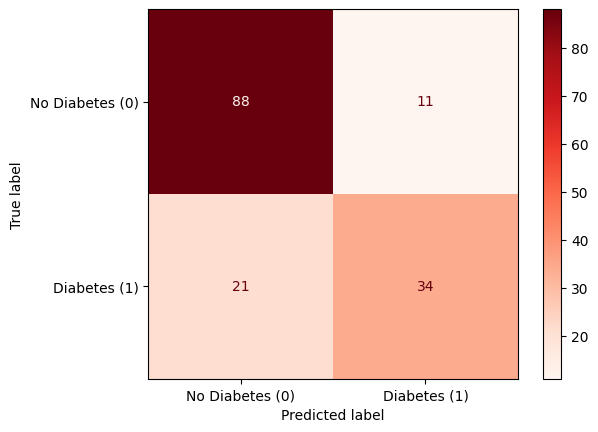

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusionMatrix = confusion_matrix(yTest, yPredScratch)
display = ConfusionMatrixDisplay(confusionMatrix, display_labels=["No Diabetes (0)", "Diabetes (1)"])
display.plot(cmap="Reds")

plt.show()

#Evaluate both Logistic Regression Models made from scatch and Scikit-Learn
## Evaluating Metrics

**Accuracy:**
- Measures how many total predictions are right

**Precision:**
- Determines how many predicted positives were actually correct
- High precision means fewer false positives and vice versa.

**Recall:**
- Determines how many actual positives were correct
- High recalls means fewer false negatives (Fewer missed cases of diabetes)

**F1-Score:**
- Determines the balance between precision and recall

# Compare Model from Scratch and Scikit-Learn

The model made from scratch is well trained as the performance is very similar and usually the exact same as the Scikit-Learn. The evalutation metric proves that as accuracy, precision, recall, f1 score are all the exact same in frequently.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate Custom Logistic Regression
accScratch = accuracy_score(yTest, yPredScratch)
precScratch = precision_score(yTest, yPredScratch)
recScratch = recall_score(yTest, yPredScratch)
f1Scratch = f1_score(yTest, yPredScratch)

print("Custom Logistic Regression Metrics:")
print(f"Accuracy: {accCustom}")
print(f"Precision: {precCustom}")
print(f"Recall: {recCustom}")
print(f"F1 Score: {f1Custom}")
print()

# Evaluate Scikit-Learn Logistic Regression
accSK = accuracy_score(yTest, yPredSK)
precSK = precision_score(yTest, yPredSK)
recSK = recall_score(yTest, yPredSK)
f1SK = f1_score(yTest, yPredSK)

print("\nScikit-Learn Logistic Regression Metrics:")
print(f"Accuracy: {accSK}")
print(f"Precision: {precSK}")
print(f"Recall: {recSK}")
print(f"F1 Score: {f1SK}")

Custom Logistic Regression Metrics:
Accuracy: 0.7922077922077922
Precision: 0.7555555555555555
Recall: 0.6181818181818182
F1 Score: 0.68

Scikit-Learn Logistic Regression Metrics:
Accuracy: 0.7922077922077922
Precision: 0.7555555555555555
Recall: 0.6181818181818182
F1 Score: 0.68


# ROC Curve and AUC

## ROC Curve

- The x-axis is the **True Positive Rate** and the y-axis is the **False Positive Rate**.

- TPR can be calculated: True Positive/True Positive + False Negative

- FPR can be calculated: False Positive/False Positive + True Negative


## AUC Curve

- Depicts whether the performance of our model
- Higher the AUC, the better the overall performance

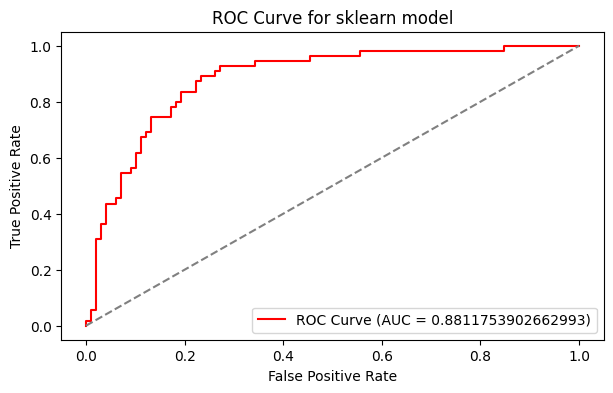

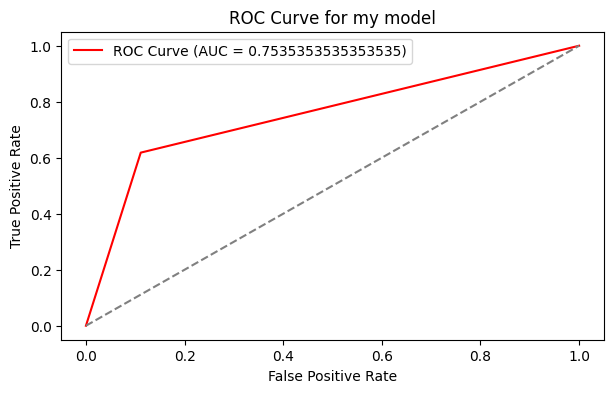

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute probabilities for Scratch Logistic Regression Model
yPredProbSK = SKModel.predict_proba(xTest)[:, 1]  # Get probability for the positive class (Diabetes)

# Compute ROC curve
# We don't need the threshold displayed on the graph
fpr, tpr, _ = roc_curve(yTest, yPredProbSK)
aucScore = roc_auc_score(yTest, yPredProbSK)

#ROC for my model
fprM, tprM, _ = roc_curve(yTest, yPredScratch)
aucScoreM = roc_auc_score(yTest, yPredScratch)

# Plots the ROC Curve includes the AUC value
plt.figure(figsize=(7,4))
plt.plot(fpr, tpr, color='red', label=f"ROC Curve (AUC = {aucScore})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random guessing line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for sklearn model")
plt.legend()
plt.show()

# Plots the ROC Curve includes the AUC value
plt.figure(figsize=(7,4))
plt.plot(fprM, tprM, color='red', label=f"ROC Curve (AUC = {aucScoreM})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random guessing line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for my model")
plt.legend()
plt.show()

In [ ]:
# Input values to test your own data
Preg = int(input("Pregnancy: "))
Gluc = int(input("Glucose: "))
BP = int(input("Blood Pressure: "))
ST = int(input("Skin Thickness: "))
Insulin = int(input("Insulin: "))
BMI = float(input("BMI: "))
DPF = float(input("Diabetes Pedigree Function: "))
Age = int(input("Age: "))

# Make an np array with the feature values
Features = np.array([[Preg, Gluc, BP, ST, Insulin, BMI, DPF, Age]])

# Use the predict method with the trained model from scratch
Diabetes = predict(Features, w, b)

# Return whether you have diabetes or not
if Diabetes == 1:
  print("Diabete!.")
else:
  print("No diabetes.")

Pregnancy: 1
Glucose: 89
Blood Pressure: 66
Skin Thickness: 23
Insulin: 94
BMI: 28.1
Diabetes Pedigree Function: 0.167
Age: 21
Diabete!.


# Conclusion

Building the Logistic Regression Model from scratch is equally as effective as the Scikit-Learn model. This can depicted through the performance metric. The model's continous effectiveness above 70% also proves that this model is effective in determining whether someone has diabetes or not.